## Homework 4

### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xMin = 1.2345
xMax = 2.3445
nSteps = 17

x = np.array([])

for _ in range(nSteps):
    x = np.append(x, (xMax - xMin) / 17)

### Part 2

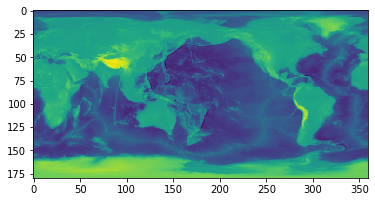

In [3]:
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
plt.show()

oneRad = np.radians(1)
rEarth = 6.371 * (10 ** 6) # in meters

In [4]:
SA = 0
for theta in range(180):
    for phi in range(360):
        SA += (rEarth ** 2) * np.sin(np.radians(theta)) * oneRad * oneRad

In [5]:
waterSA = 0
for lat in range(180):
    for lon in range(360):
        if H[lat, lon] <= 0:
            waterSA += (rEarth ** 2) * np.sin(np.radians(lat)) * (oneRad ** 2)

In [6]:
waterV = 0 # in meters cubed
for lat in range(180):
    for lon in range(360):
        depth = H[lat, lon]
        if depth < 0:
            patchSA = (rEarth ** 2) * np.sin(np.radians(lat)) * oneRad * oneRad
            waterV += patchSA * (-1 * depth)
waterV

1.3385383629690079e+18

(1) meteorite

In [7]:
meteoriteWaterV = 0 # in meters cubed
for lat in range(180):
    for lon in range(360):
        depth = H[lat, lon]
        if depth < 0:
            patchSA = (rEarth ** 2) * np.sin(np.radians(lat)) * oneRad * oneRad
            meteoriteWaterV += patchSA * ((-1 * depth) - 850)

In [8]:
percentageDecrease = (waterV - meteoriteWaterV) / waterV
print(percentageDecrease)

0.22985744658641627


The volume decreased by 22.99%

In [9]:
magicWaterSA = 0 # in meters cubed
magicH = H - 450
for lat in range(180):
    for lon in range(360):
        if magicH[lat, lon] <= 0:
            magicWaterSA += (rEarth ** 2) * np.sin(np.radians(lat)) * (oneRad ** 2)

In [10]:
waterSA/SA

0.7115027934257333

In [11]:
percentageMagic = magicWaterSA / SA
print(percentageMagic)

0.8573275748411675


85.73% of the Earth's surface

In [12]:
guessWaterV = 0 # in meters cubed
increaseSeaLevel = 380
guessH = H - increaseSeaLevel
for lat in range(180):
    for lon in range(360):
        depth = guessH[lat, lon]
        if depth < 0:
            patchSA = (rEarth ** 2) * np.sin(np.radians(lat)) * oneRad * oneRad
            guessWaterV += patchSA * (-1 * depth)

In [13]:
(guessWaterV - waterV) / waterV
# A 380 m increase in sea level would lead to a 11% increase in ocean volume

0.11282317983933156

## Part 3

In [14]:
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
plate = np.loadtxt('plate.txt', usecols=(0,1)) 

lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

In [15]:
x = -35 * (10 ** -3) * np.cos(np.radians(32)) # lon shift in mm
y = 35 * (10 ** -3) * np.sin(np.radians(32)) # lat shift in mm

def move(currY, currX, moveY, moveX):
    """X is longitude, Y is latitude. """
    return (currY + moveY, currX + moveX,)

In [16]:
# LAX 33°56’38.89” N and 118°24’09.04” W
# UCB 37°52’19.54” N and 122°15’28.19” W

latLAX = 33 + (56/60) + (38.89/3600)
lonLAX = -1 * (118 + (24/60) + (9.04/3600))
latUCB = 37 + (52/60) + (19.54/3600)
lonUCB = -1 * (122 + (15/60) + (28.19/3600))

In [17]:
convertLat = lambda deg: deg * 2 * np.pi * rEarth / 360
convertLon = lambda deg: deg * np.pi * rEarth * np.cos(np.radians(35.5)) / 180

In [18]:
rEarthMM = rEarth * (10 ** (3))

In [19]:
convertDistanceDegLatMM = lambda d: (d * 360) / (2 * np.pi * rEarthMM)
convertDistanceDegLonMM = lambda d: (d * 180) / (np.pi * rEarthMM * np.cos(np.radians(35.5)))

In [20]:
latLAX = convertLat(latLAX)
lonLAX = convertLon(lonLAX)

latUCB = convertLat(latUCB)
lonUCB = convertLon(lonUCB)

In [21]:
shiftLat = convertDistanceDegLatMM(y)
shiftLon = convertDistanceDegLonMM(x)
# shiftLat = y
# shiftLon = x

In [22]:
plateLats = plate[:, 1]
plateLons = plate[:, 0]

# plateLats = [convertLat(lat) for lat in plateLats]
# plateLons = [convertLon(lon) for lon in plateLons]

In [23]:
# 1 mil
# milShiftLat = y * (10 ** 6)
# milShiftLon = x * (10 ** 6)

milShiftLat = shiftLat * (10 ** 6)
milShiftLon = shiftLon * (10 ** 6)

milPlateLats = [lat + milShiftLat for lat in plateLats]
milPlateLons = [lon + milShiftLon for lon in plateLons]

# milPlateLats = [convertDistanceDegLatMM(lat) for lat in milPlateLats]
# milPlateLons = [convertDistanceDegLonMM(lon) for lon in milPlateLons]

oneMilPlate = [milPlateLons, milPlateLats]

# 5 mil
fiveMilShiftLat = 5 * milShiftLat
fiveMilShiftLon = 5 * milShiftLat

fiveMilPlateLats = [lat + fiveMilShiftLat for lat in plateLats]
fiveMilPlateLons = [lon + fiveMilShiftLon for lon in plateLons]

# fiveMilPlateLats = [convertDistanceDegLatMM(lat) for lat in fiveMilPlateLons]
# fiveMilPlateLons = [convertDistanceDegLonMM(lon) for lon in fiveMilPlateLons]

fiveMilPlate = [fiveMilPlateLons, fiveMilPlateLats]

# 25 mil
twentyFiveMilShiftLat = 25 * milShiftLat
twentyFiveMilShiftLon = 25 * milShiftLat

twentyFiveLats = [lat + twentyFiveMilShiftLat for lat in plateLats]
twentyFiveLons = [lon + twentyFiveMilShiftLon for lon in plateLons] 

# twentyFiveLats = [convertDistanceDegLatMM(lat) for lat in twentyFiveLats]
# twentyFiveLons = [convertDistanceDegLonMM(lon) for lon in twentyFiveLons]

twentyFiveMilPlate = [twentyFiveLons, twentyFiveLats]

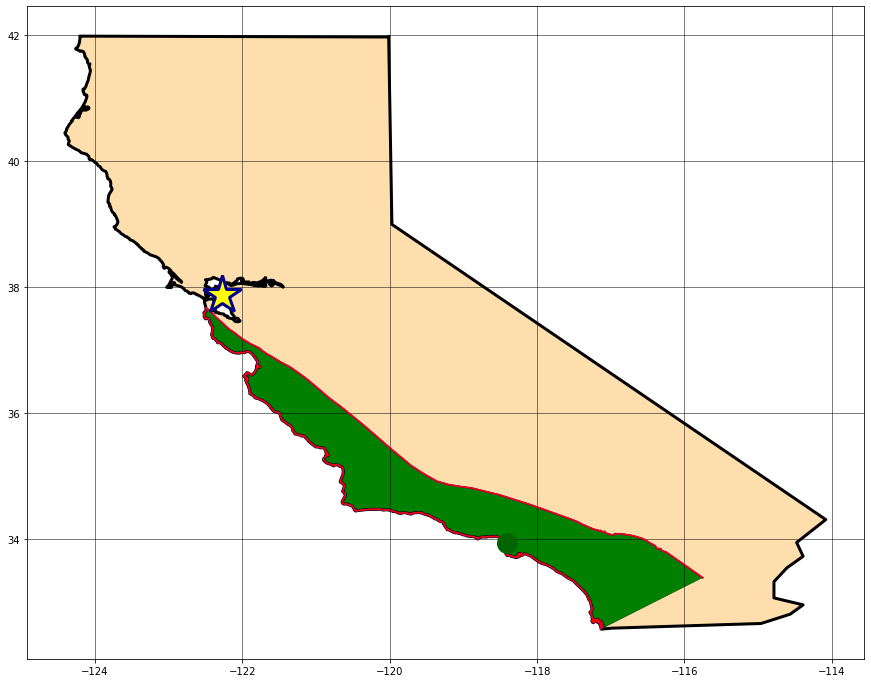

In [24]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
# plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(oneMilPlate[0],oneMilPlate[1],'b-')
plt.fill(oneMilPlate[0],oneMilPlate[1],'purple')

plt.plot(fiveMilPlate[0],fiveMilPlate[1],'r-')
plt.fill(fiveMilPlate[0],fiveMilPlate[1],'green')

# plt.plot(twentyFiveMilPlate[0],twentyFiveMilPlate[1],'b-')
# plt.fill(twentyFiveMilPlate[0],twentyFiveMilPlate[1],'blue')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

32° (counted from straight west, so that 90° would be straight north) at rate of 35  mm  per  year

In [25]:
x = -35 * (10 ** -3) * np.cos(np.radians(32))
y = 35 * (10 ** -3) * np.sin(np.radians(32))

In [26]:
(latLAX, lonLAX)

(3774415.724887917, -10718448.336336631)

In [27]:
(latUCB, lonUCB)

(4211184.7636258, -11067453.115860047)

In [28]:
newLatLAX = latLAX
newLonLAX = lonLAX
for _ in range(2 * 10 ** 7):
    newLatLAX = move(newLatLAX, newLonLAX, y, x)[0]
    newLonLAX = move(newLatLAX, newLonLAX, y, x)[1]
    
(newLatLAX, newLonLAX)

# We have to wait 20 million years for the latitude to be close to each other

(4145359.2059905026, -11312081.98807003)

In [29]:
(latUCB, lonUCB)

(4211184.7636258, -11067453.115860047)

In [30]:
4145359.2059905026/4211184.7636

0.9843688744843326